<a href="https://colab.research.google.com/github/mitesh98/Digit_Recognisation/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import matplotlib.pyplot as plt

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
x_train=x_train/255
x_test=x_test/255

In [0]:
# convert class vectors to binary class matrices
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28,28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28,28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [0]:
print("Image Data format:",K.image_data_format())

# Architecture 1: 
* Kernel Size = (2 ,2)

* No of ConvNet Layers=6

In [0]:
#Kernel=(3,3)
#5 layers ConvNet + Maxpooling +Dropout

model=Sequential()
#layer1
model.add(Conv2D(16,kernel_size=(2,2),activation='relu',input_shape=(28,28,1))) #filters=16
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
model.add(Dropout(0.25))
#layer2
model.add(Conv2D(8,kernel_size=(2,2),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3),strides=1, padding='same'))
model.add(Dropout(0.20))
#layer3
model.add(Conv2D(8,kernel_size=(2,2),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))
model.add(Dropout(0.20))
#layer4
model.add(Conv2D(4,kernel_size=(2,2),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3),strides=1, padding='same'))
model.add(Dropout(0.25))
#layer5
model.add(Conv2D(2,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))
model.add(Dropout(0.20))
#layer6
model.add(Conv2D(4,kernel_size=(2,2),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3),strides=1, padding='same'))
model.add(Dropout(0.25))
#Flattening
model.add(Flatten())
#MLP-1
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#MLP-2
model.add(Dense(10,activation='softmax'))
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 592us/step - loss: 2.1705 - acc: 0.1742 - val_loss: 1.7789 - val_acc: 0.3911
Epoch 2/10
60000/60000 [==============================] - 34s 568us/step - loss: 1.7403 - acc: 0.3372 - val_loss: 1.5126 - val_acc: 0.4317
Epoch 3/10
60000/60000 [==============================] - 35s 577us/step - loss: 1.6228 - acc: 0.3819 - val_loss: 1.4831 - val_acc: 0.4706
Epoch 4/10
60000/60000 [==============================] - 35s 582us/step - loss: 1.5660 - acc: 0.4087 - val_loss: 1.3804 - val_acc: 0.4936
Epoch 5/10
60000/60000 [==============================] - 35s 586us/step - loss: 1.5402 - acc: 0.4226 - val_loss: 1.4117 - val_acc: 0.4804
Epoch 6/10
60000/60000 [==============================] - 35s 587us/step - loss: 1.5124 - acc: 0.4293 - val_loss: 1.3430 - val_acc: 0.5145
Epoch 7/10
60000/60000 [==============================] - 35s 584us/step - loss: 1.4959 - acc: 0.4347 - val_loss: 1.

Test Loss:1.2595 
Test Accuracy:  0.5831


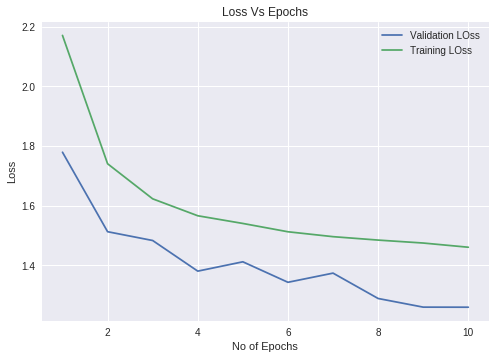

In [0]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss:%.4f '%score[0])
print('Test Accuracy: ',score[1])
x = list(range(1,11))
val_loss=history.history['val_loss']
tr_loss=history.history['loss']
plt.plot(x,val_loss,label="Validation LOss")
plt.plot(x,tr_loss,label="Training LOss")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs Epochs")
plt.legend()
plt.show()

# 2. Architecture-2
Kernel Size=(3 , 3)

No of layers=5


In [0]:
#Kernel=(3,3)
#5 layers ConvNet + Maxpooling +Dropout

model=Sequential()
#layer1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) #filters=32
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
model.add(Dropout(0.25))
#layer2
model.add(Conv2D(16,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3),strides=1, padding='same'))
model.add(Dropout(0.20))
#layer3
model.add(Conv2D(8,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
model.add(Dropout(0.20))
#layer4
model.add(Conv2D(4,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3),strides=1, padding='same'))
model.add(Dropout(0.25))
#layer5
model.add(Conv2D(2,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
model.add(Dropout(0.20))
#Flattening
model.add(Flatten())
#MLP-1
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#MLP-2
model.add(Dense(10,activation='softmax'))
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=12,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 61s 1ms/step - loss: 1.9947 - acc: 0.2163 - val_loss: 1.5339 - val_acc: 0.4172
Epoch 2/12
60000/60000 [==============================] - 59s 978us/step - loss: 1.6880 - acc: 0.3156 - val_loss: 1.3834 - val_acc: 0.4300
Epoch 3/12
60000/60000 [==============================] - 60s 993us/step - loss: 1.6349 - acc: 0.3278 - val_loss: 1.3435 - val_acc: 0.4068
Epoch 4/12
60000/60000 [==============================] - 59s 986us/step - loss: 1.5979 - acc: 0.3437 - val_loss: 1.3173 - val_acc: 0.4441
Epoch 5/12
60000/60000 [==============================] - 59s 980us/step - loss: 1.5507 - acc: 0.3738 - val_loss: 1.1010 - val_acc: 0.5531
Epoch 6/12
60000/60000 [==============================] - 59s 981us/step - loss: 1.3874 - acc: 0.4581 - val_loss: 0.9402 - val_acc: 0.6018
Epoch 7/12
60000/60000 [==============================] - 59s 984us/step - loss: 1.3182 - acc: 0.4855 - val_loss: 0.88

Test Loss:0.7554 
Test Accuracy:  0.6986


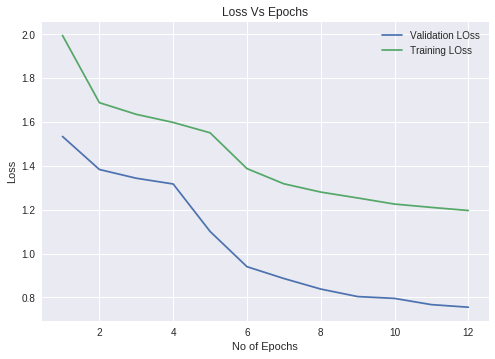

In [0]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss:%.4f '%score[0])
print('Test Accuracy: ',score[1])
x = list(range(1,13))
val_loss=history.history['val_loss']
tr_loss=history.history['loss']
plt.plot(x,val_loss,label="Validation LOss")
plt.plot(x,tr_loss,label="Training LOss")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs Epochs")
plt.legend()
plt.show()

# 2. Architecture-2

Kernel Size=(5 , 5)

No of layers=3

In [0]:
#Kernel=(5,5)
#3 layers ConvNet + Maxpooling +Dropout

model=Sequential()
#layer1
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1))) #filters=32
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
model.add(Dropout(0.25))
#layer2
model.add(Conv2D(16,kernel_size=(5,5),activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3),strides=1, padding='same'))
model.add(Dropout(0.20))
#layer3
model.add(Conv2D(8,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='same'))
model.add(Dropout(0.20))

#Flattening
model.add(Flatten())
#MLP-1
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#MLP-2
model.add(Dense(10,activation='softmax'))
#compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.6997 - acc: 0.7668 - val_loss: 0.1151 - val_acc: 0.9627
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2352 - acc: 0.9294 - val_loss: 0.0743 - val_acc: 0.9769
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1719 - acc: 0.9493 - val_loss: 0.0543 - val_acc: 0.9839
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1458 - acc: 0.9584 - val_loss: 0.0456 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1255 - acc: 0.9631 - val_loss: 0.0391 - val_acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1105 - acc: 0.9678 - val_loss: 0.0401 - val_acc: 0.9873
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1027 - acc: 0.9702 - val_loss: 0.0360 - val_acc

Test Loss:0.0336 
Test Accuracy:  0.9893


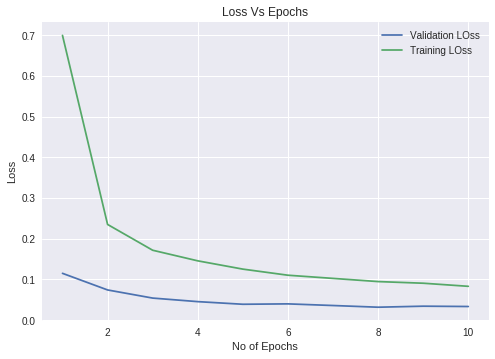

In [0]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss:%.4f '%score[0])
print('Test Accuracy: ',score[1])
x = list(range(1,11))
val_loss=history.history['val_loss']
tr_loss=history.history['loss']
plt.plot(x,val_loss,label="Validation LOss")
plt.plot(x,tr_loss,label="Training LOss")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs Epochs")
plt.legend()
plt.show()

# Conclusion:

In [0]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Kernel Size','No of ConvNet Layers','Accuracy']
x.add_row(['2*2','6',' 0.5831'])
x.add_row(['3*3','5',' 0.6986'])
x.add_row(['5*5','3',' 0.9893'])
print(x)

+-------------+----------------------+----------+
| Kernel Size | No of ConvNet Layers | Accuracy |
+-------------+----------------------+----------+
|     2*2     |          6           |  0.5831  |
|     3*3     |          5           |  0.6986  |
|     5*5     |          3           |  0.9893  |
+-------------+----------------------+----------+


# Observations:

**1. In architecture-1 we model is highly overfitting as both training and validation loss is too high.
So we can try to decrease the depth of model to decrease the parameters.Performance is not good **

**2.  In architecture-2 our model is better than first one.But its still overfitting as both training and validation loss is thigh.
 Performance is still not good.So we can try to some other architecture.**

**3.  In architecture-3 our model performance is good.**

